In [1]:
#import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Activation,Layer,Lambda
import seaborn as sns
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions

In [2]:
#Importing dataset
turbine_data=pd.read_csv('F:/Data Science Assignments/Neural Networks/gas_turbines.csv')
turbine_data

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [3]:
turbine_data.isna().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [4]:
turbine_data.dtypes

AT      float64
AP      float64
AH      float64
AFDP    float64
GTEP    float64
TIT     float64
TAT     float64
TEY     float64
CDP     float64
CO      float64
NOX     float64
dtype: object

In [5]:
turbine_data.describe(include='all')

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


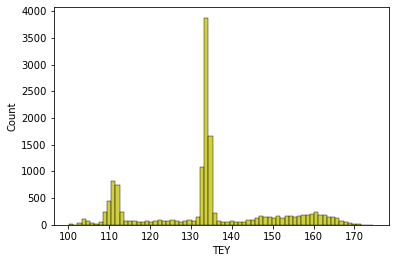

In [6]:
sns.histplot(turbine_data['TEY'],color='y')
plt.show()

In [7]:
corr = turbine_data[turbine_data.columns].corr()

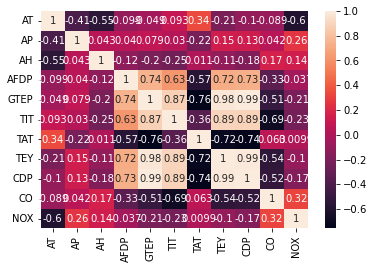

In [8]:
sns.heatmap(corr,annot=True)
plt.show()


In [9]:
#Data preparation

In [10]:
X = turbine_data.loc[:,['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'CDP', 'CO','NOX']]
y= turbine_data.loc[:,['TEY']]

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

In [12]:
scaler.inverse_transform(y)

array([[114.7 ],
       [114.72],
       [114.71],
       ...,
       [110.19],
       [110.74],
       [111.58]])

In [13]:
from sklearn.model_selection import cross_val_score, KFold, train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [14]:
from keras.models import Sequential
from keras.layers import Dense, Activation,Layer

In [15]:
model = Sequential()
model.add(Dense(12, input_dim=10, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                132       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 245
Trainable params: 245
Non-trainable params: 0
_________________________________________________________________


In [17]:
#Architecture Compilation
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
model.fit(X_train, y_train, epochs=10, batch_size=10)

Epoch 1/10
1053/1053 [==============================] - 9s 6ms/step - loss: -109.2905 - accuracy: 0.0000e+00
Epoch 2/10
1053/1053 [==============================] - 5s 5ms/step - loss: -1560.7878 - accuracy: 0.0000e+00
Epoch 3/10
1053/1053 [==============================] - 6s 6ms/step - loss: -5712.6812 - accuracy: 0.0000e+00
Epoch 4/10
1053/1053 [==============================] - 5s 5ms/step - loss: -13206.8506 - accuracy: 0.0000e+00
Epoch 5/10
1053/1053 [==============================] - 5s 5ms/step - loss: -24514.9395 - accuracy: 0.0000e+00
Epoch 6/10
1053/1053 [==============================] - 6s 5ms/step - loss: -40106.1328 - accuracy: 0.0000e+00
Epoch 7/10
1053/1053 [==============================] - 5s 5ms/step - loss: -60396.8672 - accuracy: 0.0000e+00
Epoch 8/10
1053/1053 [==============================] - 5s 5ms/step - loss: -85682.8281 - accuracy: 0.0000e+00
Epoch 9/10
1053/1053 [==============================] - 6s 5ms/step - loss: -116103.2734 - accuracy: 0.0000e+00
Epoc

In [19]:
result = model.evaluate(x=X_test,y=y_test)
result

141/141 [==============================] - 2s 5ms/step - loss: -179631.2656 - accuracy: 0.0000e+00


[-179631.265625, 0.0]

In [20]:
print('Model Accuracy : ',round(result[1],2))
print('Loss           : ',round(result[0],2))

Model Accuracy :  0.0
Loss           :  -179631.27


In [21]:
model2 = Sequential()
model2.add(Dense(12, input_dim=10, activation='relu'))
model2.add(Dense(8, activation='relu'))
model2.add(Dense(1, activation='relu'))

In [22]:
model2.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [23]:
model2.fit(X_train, y_train, epochs=10, batch_size=10)

Epoch 1/10
1053/1053 [==============================] - 8s 5ms/step - loss: 0.5547 - accuracy: 0.0000e+00
Epoch 2/10
1053/1053 [==============================] - 5s 5ms/step - loss: 0.4786 - accuracy: 0.0000e+00
Epoch 3/10
1053/1053 [==============================] - 5s 5ms/step - loss: 0.4759 - accuracy: 0.0000e+00
Epoch 4/10
1053/1053 [==============================] - 6s 5ms/step - loss: 0.4748 - accuracy: 0.0000e+00
Epoch 5/10
1053/1053 [==============================] - 7s 6ms/step - loss: 0.4743 - accuracy: 0.0000e+00
Epoch 6/10
1053/1053 [==============================] - 6s 6ms/step - loss: 0.4741 - accuracy: 0.0000e+00
Epoch 7/10
1053/1053 [==============================] - 5s 5ms/step - loss: 0.4740 - accuracy: 0.0000e+00
Epoch 8/10
1053/1053 [==============================] - 5s 5ms/step - loss: 0.4740 - accuracy: 0.0000e+00
Epoch 9/10
1053/1053 [==============================] - 5s 5ms/step - loss: 0.4739 - accuracy: 0.0000e+00
Epoch 10/10
1053/1053 [=======================

In [24]:
result = model2.evaluate(x=X_test,y=y_test)
result

141/141 [==============================] - 1s 5ms/step - loss: 0.4904 - accuracy: 0.0000e+00


[0.49041324853897095, 0.0]

In [25]:
print('Model2 Accuracy : ',round(result[1],2))
print('Loss           : ',round(result[0],2))

Model2 Accuracy :  0.0
Loss           :  0.49


In [26]:
model3 = Sequential()
model3.add(Dense(12, input_dim=10, activation='relu'))
model3.add(Dense(8, activation='relu'))
model3.add(Dense(1, activation='relu'))

In [27]:
model3.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])

In [28]:
model3.fit(X_train, y_train, epochs=10, batch_size=10)

Epoch 1/10
1053/1053 [==============================] - 7s 5ms/step - loss: 0.5040 - accuracy: 0.0000e+00
Epoch 2/10
1053/1053 [==============================] - 5s 5ms/step - loss: 0.4782 - accuracy: 0.0000e+00
Epoch 3/10
1053/1053 [==============================] - 5s 5ms/step - loss: 0.4769 - accuracy: 0.0000e+00
Epoch 4/10
1053/1053 [==============================] - 5s 5ms/step - loss: 0.4762 - accuracy: 0.0000e+00
Epoch 5/10
1053/1053 [==============================] - 5s 5ms/step - loss: 0.4757 - accuracy: 0.0000e+00
Epoch 6/10
1053/1053 [==============================] - 5s 5ms/step - loss: 0.4754 - accuracy: 0.0000e+00
Epoch 7/10
1053/1053 [==============================] - 5s 5ms/step - loss: 0.4752 - accuracy: 0.0000e+00
Epoch 8/10
1053/1053 [==============================] - 5s 5ms/step - loss: 0.4750 - accuracy: 0.0000e+00
Epoch 9/10
1053/1053 [==============================] - 5s 5ms/step - loss: 0.4749 - accuracy: 0.0000e+00
Epoch 10/10
1053/1053 [=======================